# What has done so far

. handling outlier

. handle dublicates

. handle missing value

. select best feature

. train test split

. minmaxscaler

. apply PCA to select best 10 features

. handle imbalance data

. apply cross_validation on different models

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
for col in df.columns:
  print(df[col].value_counts())
  print('\n\n///////////////////\n\n')


customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


///////////////////


gender
Male      3555
Female    3488
Name: count, dtype: int64


///////////////////


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


///////////////////


Partner
No     3641
Yes    3402
Name: count, dtype: int64


///////////////////


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


///////////////////


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


///////////////////


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


///////////////////


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


///////////////////


Intern

# Bivariate  plots


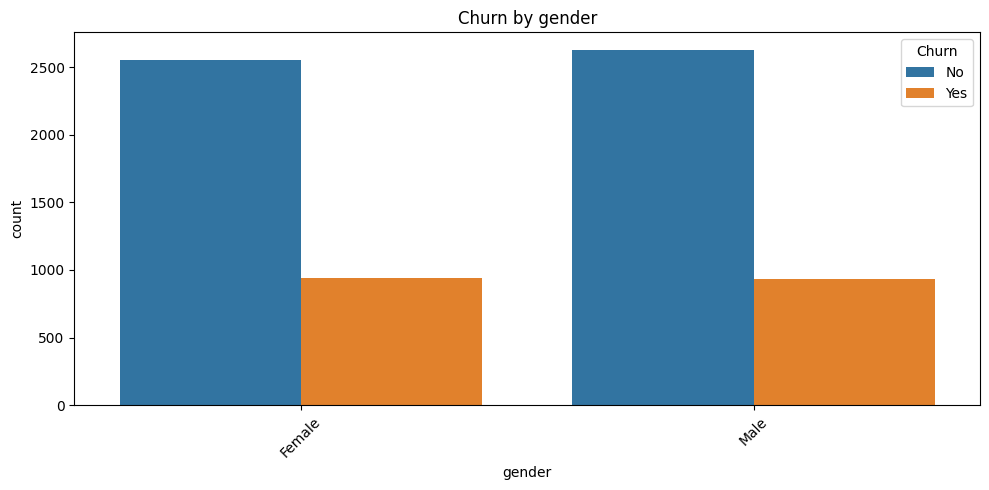

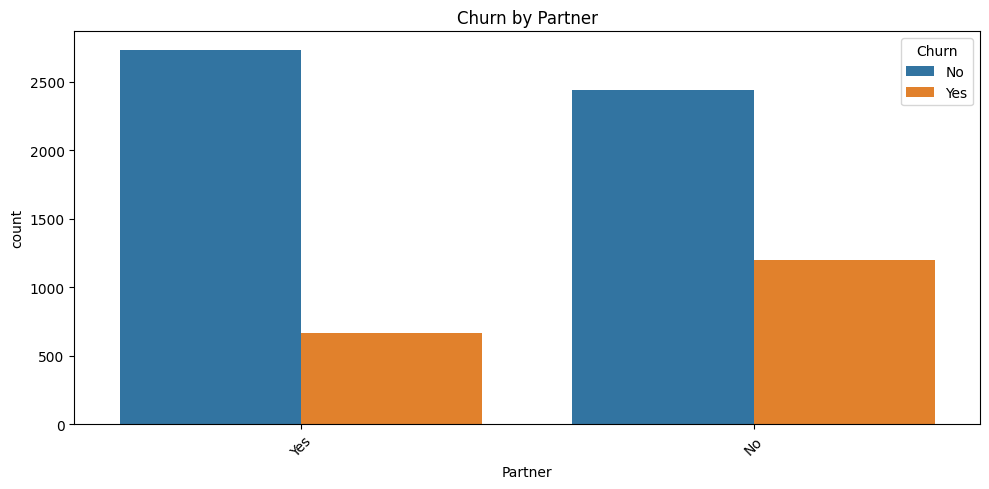

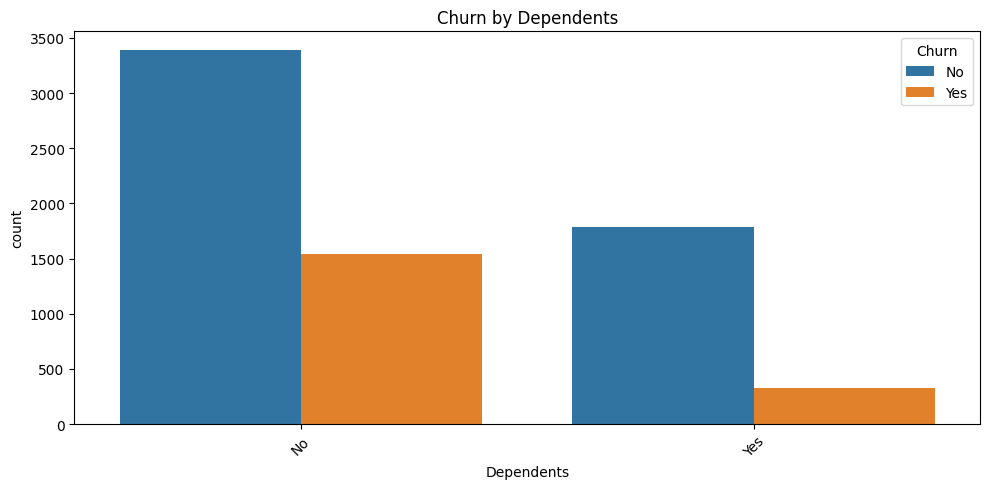

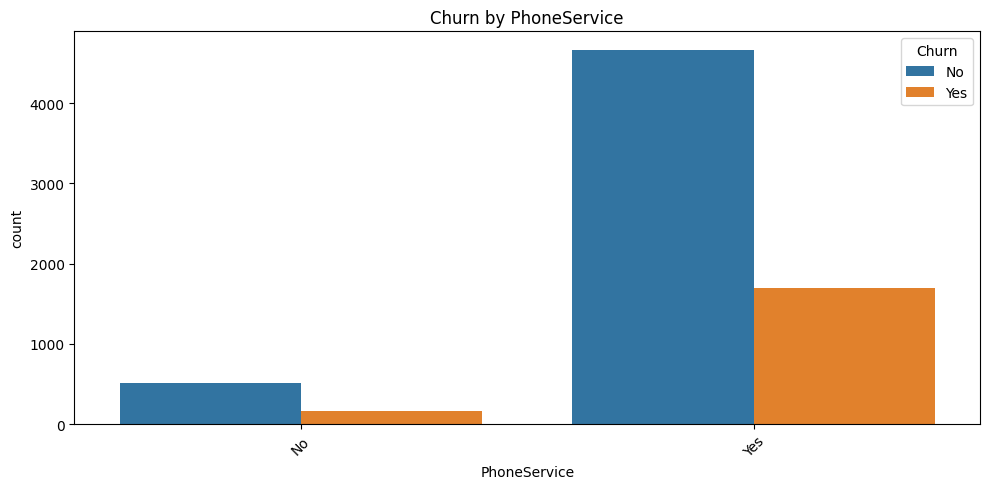

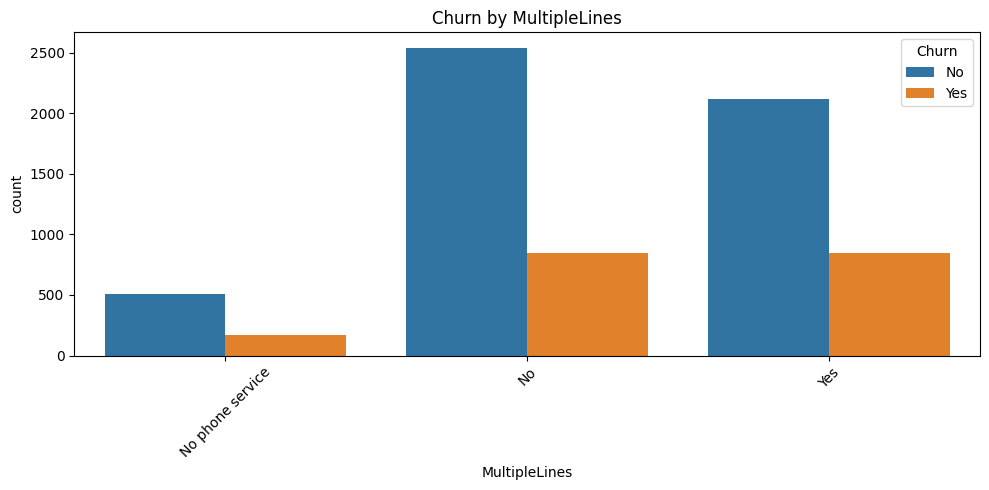

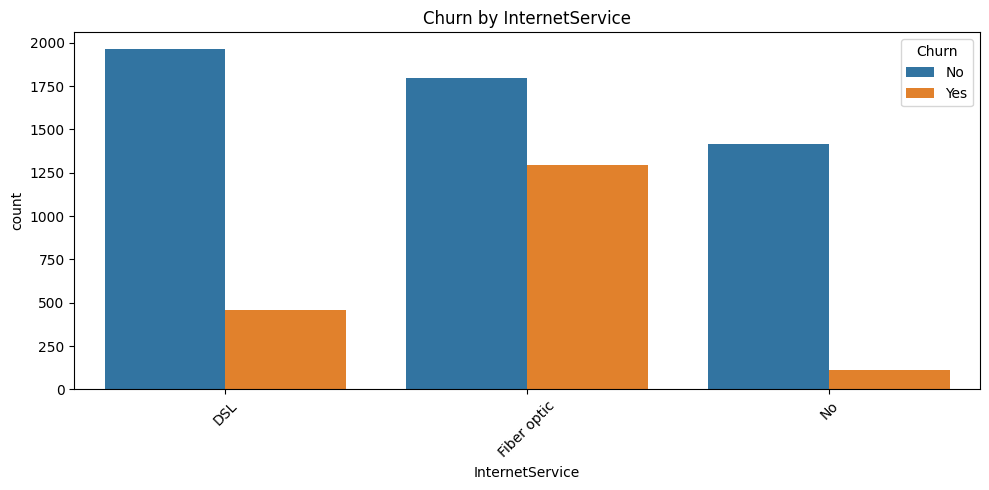

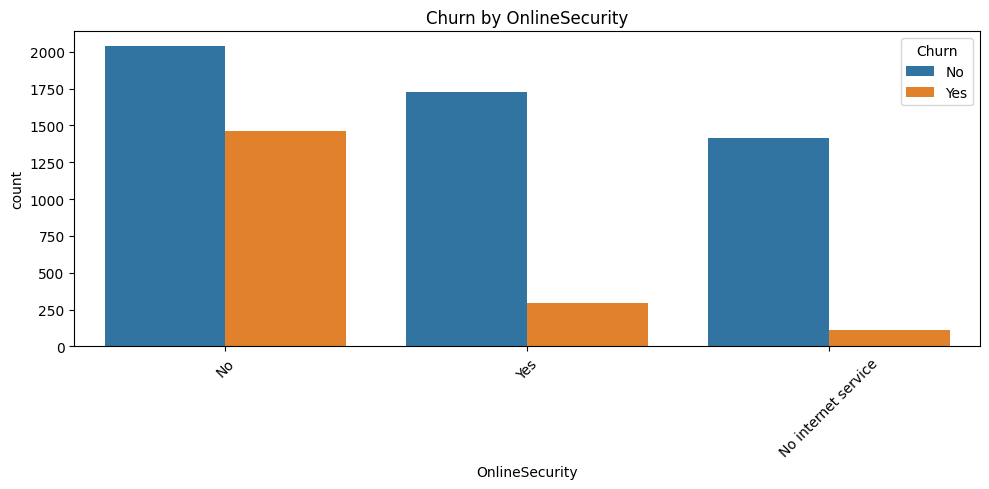

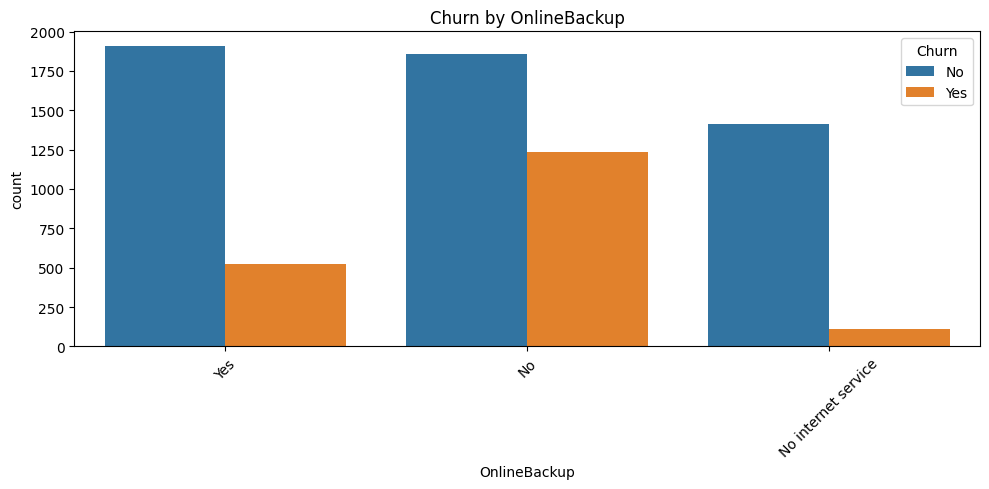

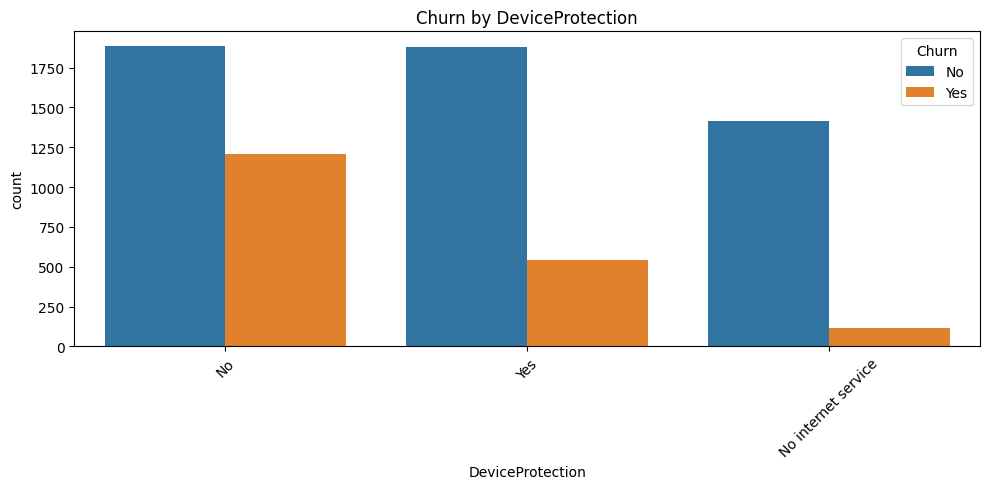

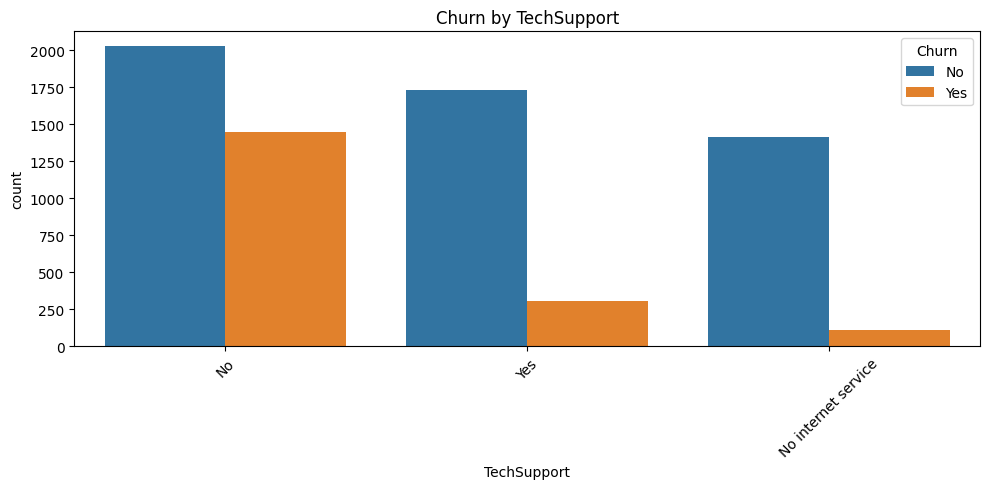

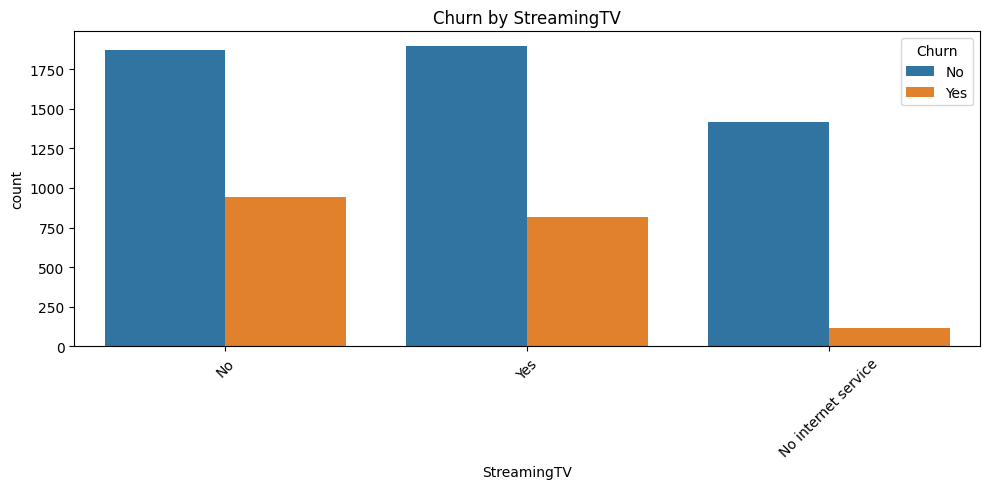

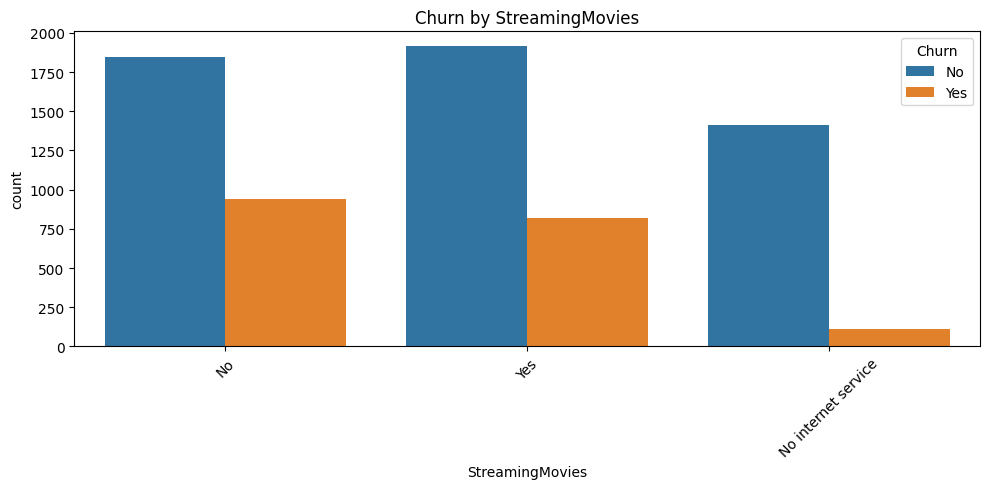

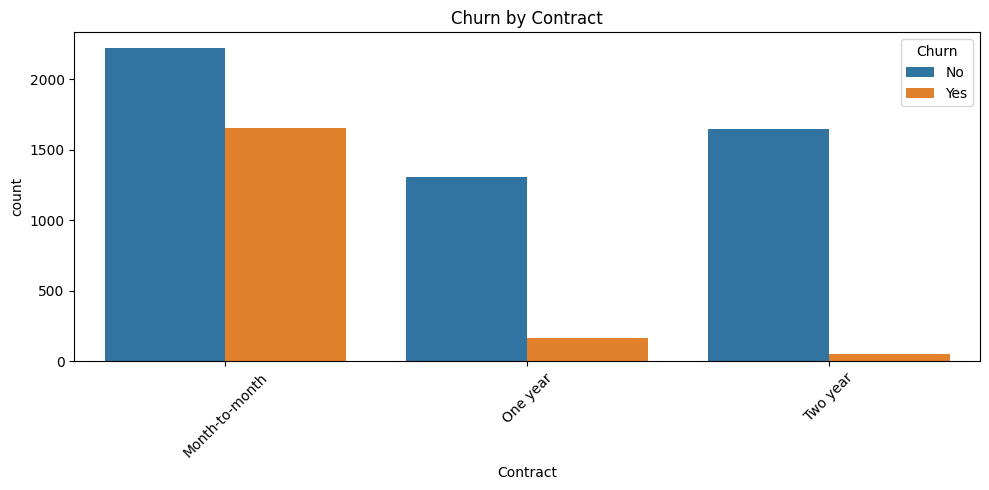

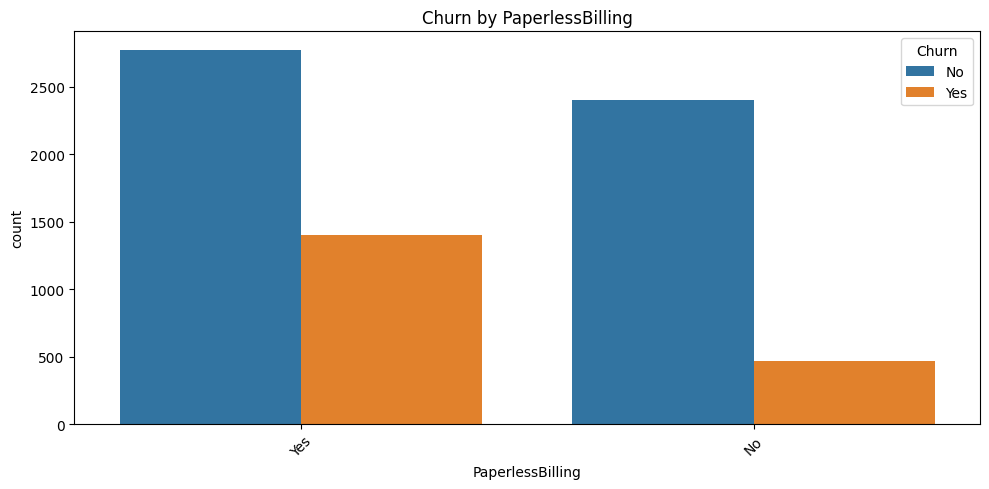

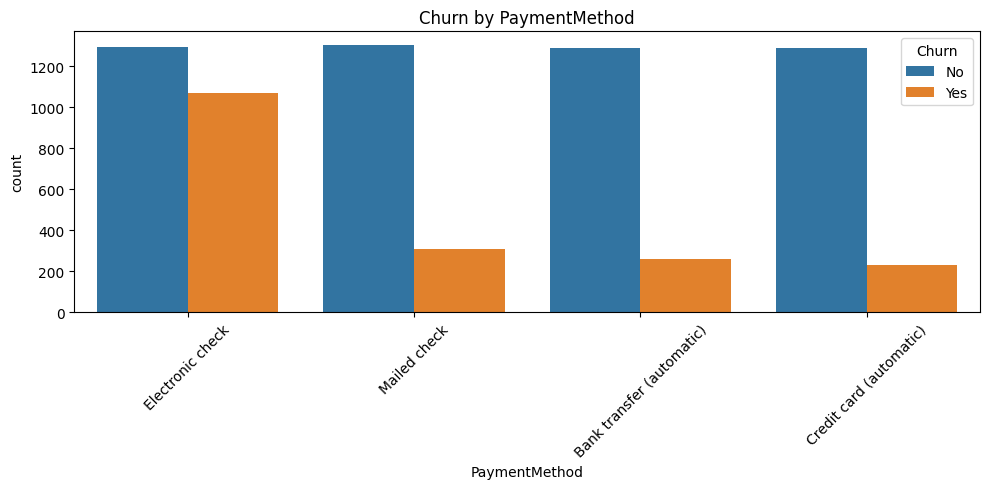

In [ ]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and col not in ['Churn', 'customerID', 'TotalCharges']]

# Plot each categorical feature against Churn
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# handle datatype and drop the missing values


In [ ]:
#change totalcharges datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
from operator import le
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

# Check outliers
for monthlycharges , totalcharges and
tenure

using box plots and IQR


conclusion : didn't notice any outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

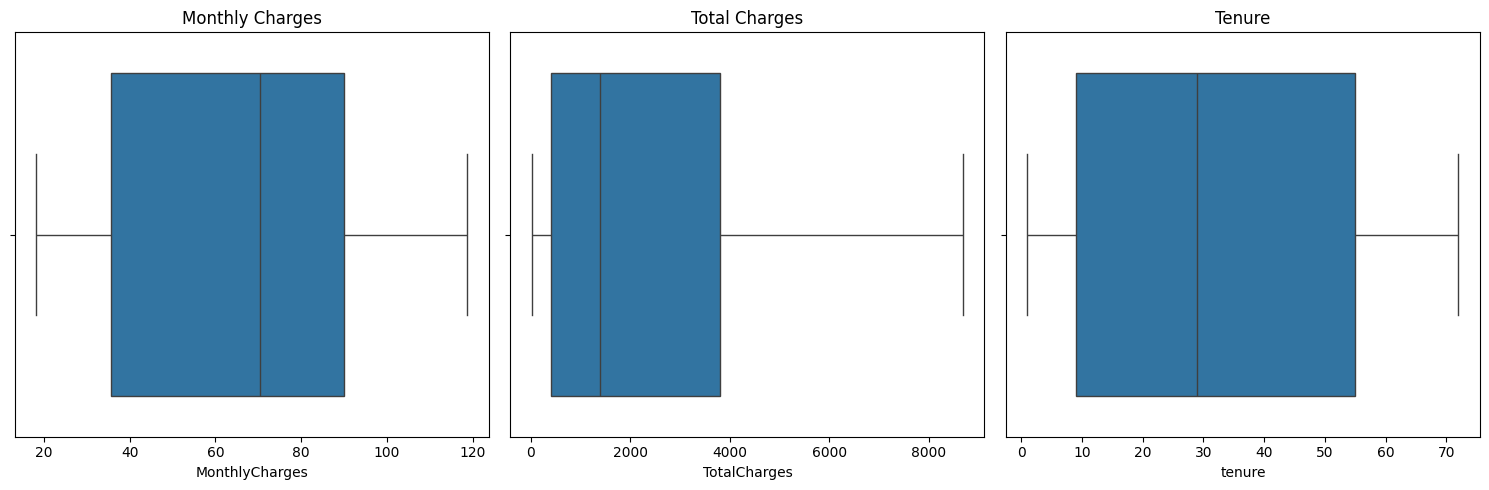

In [ ]:
plt.figure(figsize=(15, 5))

# Plot MonthlyCharges
plt.subplot(1, 3, 1)
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Monthly Charges')

# Plot TotalCharges
plt.subplot(1, 3, 2)
sns.boxplot(x=df['TotalCharges'])
plt.title('Total Charges')

# Plot tenure
plt.subplot(1, 3, 3)
sns.boxplot(x=df['tenure'])
plt.title('Tenure')

# Adjust layout
plt.tight_layout()
plt.show()

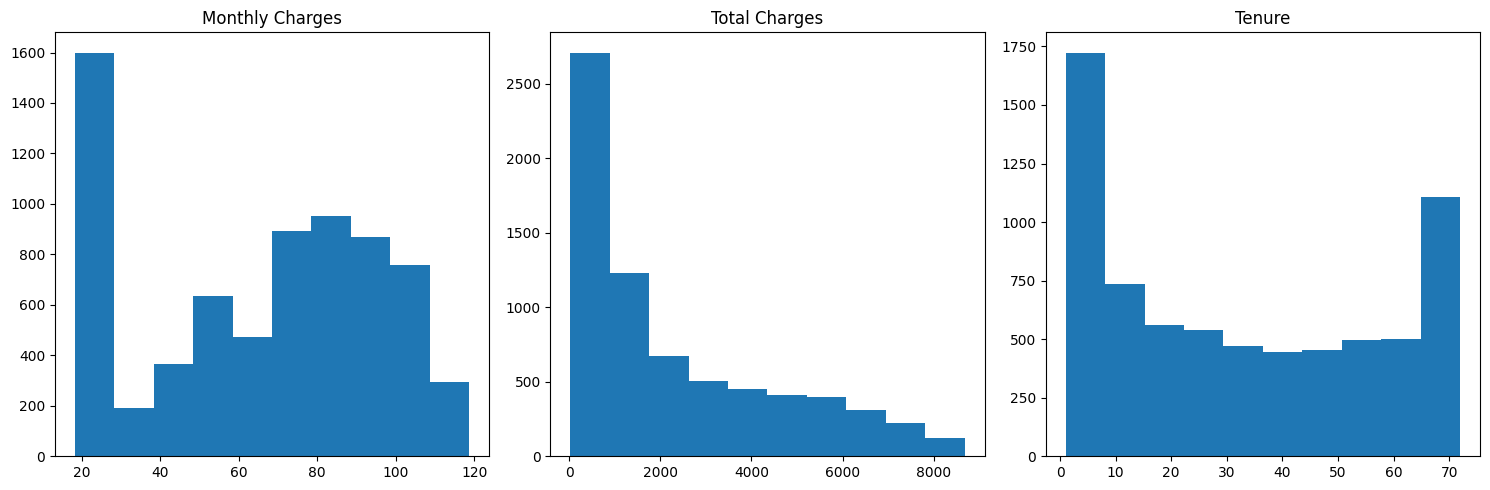

In [ ]:
plt.figure(figsize=(15, 5))

# Plot MonthlyCharges
plt.subplot(1, 3, 1)
plt.hist(df['MonthlyCharges'])
plt.title('Monthly Charges')

# Plot TotalCharges
plt.subplot(1, 3, 2)
plt.hist(x=df['TotalCharges'])
plt.title('Total Charges')

# Plot tenure
plt.subplot(1, 3, 3)
plt.hist(x=df['tenure'])
plt.title('Tenure')

# Adjust layout
plt.tight_layout()
plt.show()

# applying transformation

i used quantile transformation as well as the squared transformation and didn't
improving the accuracy

In [ ]:
# from sklearn.preprocessing import QuantileTransformer

# # Instantiate the QuantileTransformer
# quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# # Apply the transformation to the relevant columns
# df['MonthlyCharges'] = quantile_transformer.fit_transform(df[['MonthlyCharges']])
# df['TotalCharges'] = quantile_transformer.fit_transform(df[['TotalCharges']])
# df['tenure'] = quantile_transformer.fit_transform(df[['tenure']])


# plt.figure(figsize=(15, 5))

# # Plot transformed MonthlyCharges
# plt.subplot(1, 3, 1)
# plt.hist(df['MonthlyCharges'], bins=30)
# plt.title('Transformed Monthly Charges')

# # Plot transformed TotalCharges
# plt.subplot(1, 3, 2)
# plt.hist(df['TotalCharges'], bins=30)
# plt.title('Transformed Total Charges')

# # Plot transformed Tenure
# plt.subplot(1, 3, 3)
# plt.hist(df['tenure'], bins=30)
# plt.title('Transformed Tenure')

# plt.tight_layout()
# plt.show()



In [ ]:
def calc_IQR(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  return outliers


monthly_outliers = calc_IQR(df, 'MonthlyCharges')
total_outliers = calc_IQR(df, 'TotalCharges')
tenure_outliers = calc_IQR(df, 'tenure')

print(monthly_outliers)
print(total_outliers)
print(tenure_outliers)



Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0

# Correlation and significant features


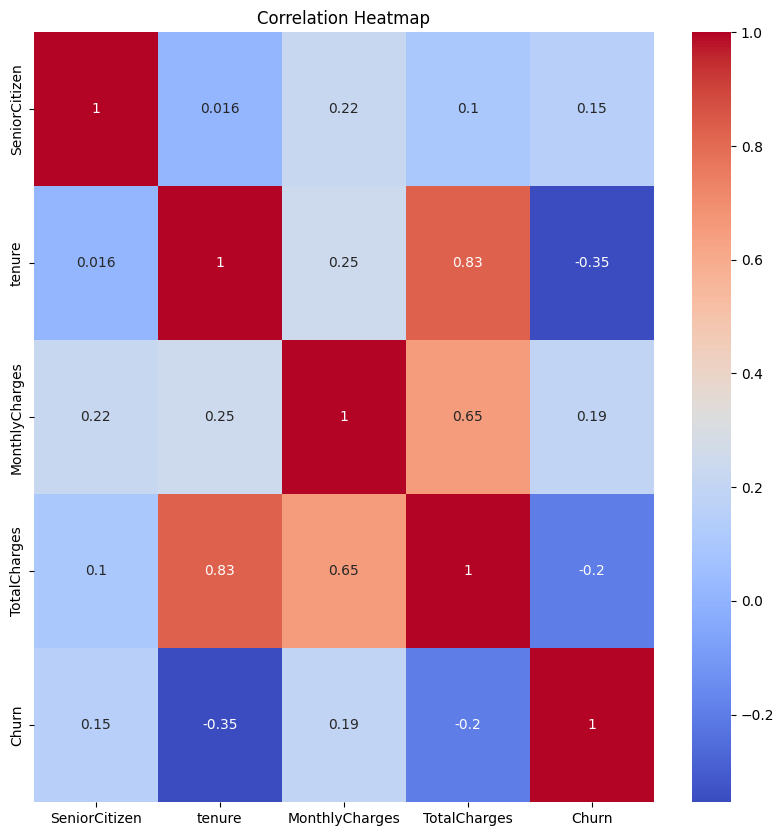

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from scipy import stats

anova_feature1 = stats.f_oneway(df[df['Churn'] == 0]['TotalCharges'],
                                df[df['Churn'] == 1]['TotalCharges'],)

# Perform one-way ANOVA for Feature2
anova_feature2 = stats.f_oneway(df[df['Churn'] == 0]['tenure'],
                                df[df['Churn'] == 1]['tenure'],)


print(f'ANOVA result for Feature1: F-statistic={anova_feature1.statistic}, p-value={anova_feature1.pvalue}')
print(f'ANOVA result for Feature2: F-statistic={anova_feature2.statistic}, p-value={anova_feature2.pvalue}')

ANOVA result for Feature1: F-statistic=291.34486236649343, p-value=4.8768656897080145e-64
ANOVA result for Feature2: F-statistic=1007.5094314093412, p-value=9.437650217603554e-207


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
df = df.drop('customerID', axis=1)
category_columns = df.select_dtypes(include=['object']).columns
results = []

for col in category_columns:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    significance = 'Significant' if p < 0.05 else 'Not Significant'
    results.append([col, p, significance])

chi2_df = pd.DataFrame(results, columns=['Feature', 'p-value', 'Significance'])
df_without_TPG = df.drop(['PhoneService', 'gender' , 'TotalCharges'], axis=1)


In [ ]:
chi2_df

,Feature,p-value,Significance
0,gender,4.904885e-01,Not Significant
1,Partner,3.973798e-36,Significant
2,Dependents,2.019659e-42,Significant
3,PhoneService,3.499240e-01,Not Significant
4,MultipleLines,3.567927e-03,Significant
5,InternetService,5.831199e-159,Significant
6,OnlineSecurity,1.400687e-184,Significant
7,OnlineBackup,7.776099e-131,Significant
8,DeviceProtection,1.959389e-121,Significant
9,TechSupport,7.407808e-180,Significant


# label encoding the categorical features



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_dummy = df_without_TPG.drop('Churn', axis=1)
df_dummy = pd.get_dummies(df_dummy, drop_first=True)
df_dummy['Churn'] = df_without_TPG['Churn']


df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,0
1,0,34,56.95,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,0
2,0,2,53.85,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,1
3,0,45,42.30,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,0
4,0,2,70.70,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,1


In [ ]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   Partner_Yes                            7032 non-null   bool   
 4   Dependents_Yes                         7032 non-null   bool   
 5   MultipleLines_No phone service         7032 non-null   bool   
 6   MultipleLines_Yes                      7032 non-null   bool   
 7   InternetService_Fiber optic            7032 non-null   bool   
 8   InternetService_No                     7032 non-null   bool   
 9   OnlineSecurity_No internet service     7032 non-null   bool   
 10  OnlineSecurity_Yes                     7032 non-null   bool   
 11  OnlineBac

# check duplicates

In [ ]:
df_dummy.loc[df.duplicated()].shape


(22, 28)

In [ ]:
df_dummy = df_dummy.drop_duplicates()
df_dummy.shape

(6974, 28)

# Handle imbalance target class


In [ ]:
X = df_dummy.drop('Churn', axis=1)
y = df_dummy['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state =42 ,stratify=y, test_size = 0.2)
print(y_train.value_counts())


Churn
0    4103
1    1476
Name: count, dtype: int64


In [ ]:
# apply some kind of transformation minmaxscaler or standarization
# but since standarization is used usually when the columns is normal distrubuted
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)



In [ ]:
#applying oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)
x_train_smote, y_train_smote = smote.fit_resample(x_train_pca, y_train)
print(y_train_smote.value_counts())

Churn
0    4103
1    4103
Name: count, dtype: int64


In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.model_selection import  StratifiedKFold
# from sklearn.ensemble import GradientBoostingClassifier


# CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# sfs = SFS(GradientBoostingClassifier(n_estimators=100, random_state=42),
#           k_features = 9,
#           forward= True,
#           floating = False,
#           verbose= 2,
#           scoring= 'accuracy',
#           cv = CV,
#           n_jobs= -1).fit(x_train_smote, y_train_smote)


# print( sfs.k_feature_names_)

# integer_indices = [int(x) for x in sfs.k_feature_names_]

# x_train_new_smote = X_train_smote[:, integer_indices]
#x_test_new_smote = x_test_scaled[:, integer_indices]

# modeling with PCA



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

CV = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy'),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(criterion='entropy'),
    'XGBoost': XGBClassifier(max_depth = 5 , n_estimators = 300 , random_state = 0),
    'Logistic Regression': LogisticRegression()
}


print("Cross-Validation Results:")
for name, model in models.items():
    cross_val_results = cross_val_score(model, x_train_smote, y_train_smote, cv=CV, scoring='accuracy')
    print(f'Model: {name}')
    print(f'Cross-Validation Accuracy: {cross_val_results}')
    print(f'Mean Accuracy: {cross_val_results.mean():.2f}\n')

# Model training and evaluation on the test set
final_models = {
    'Random Forest': RandomForestClassifier(criterion='entropy'),
    'XGBoost': XGBClassifier(max_depth=5, n_estimators=300, random_state=0),
    'Gradient Boosting': GradientBoostingClassifier()
}

print("Test Set Results:")
for name, model in final_models.items():
    model.fit(x_train_smote, y_train_smote)
    y_pred = model.predict(x_test_pca)
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Cross-Validation Results:
Model: Decision Tree
Cross-Validation Accuracy: [0.75274056 0.75441804 0.79037172 0.74223035 0.75746496]
Mean Accuracy: 0.76

Model: KNN
Cross-Validation Accuracy: [0.7911084  0.78001219 0.80377818 0.79037172 0.77635588]
Mean Accuracy: 0.79

Model: Gradient Boosting
Cross-Validation Accuracy: [0.78562728 0.77269957 0.80621572 0.78549665 0.77209019]
Mean Accuracy: 0.78

Model: Random Forest
Cross-Validation Accuracy: [0.82338611 0.80682511 0.84399756 0.82205972 0.79463742]
Mean Accuracy: 0.82

Model: XGBoost
Cross-Validation Accuracy: [0.81912302 0.79159049 0.82876295 0.81962218 0.78488726]
Mean Accuracy: 0.81

Model: Logistic Regression
Cross-Validation Accuracy: [0.77344702 0.75746496 0.77879342 0.76173065 0.73918342]
Mean Accuracy: 0.76

Test Set Results:
Model: Random Forest
Accuracy: 0.73
F1 Score: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1026
           1       0.50

# Modeling without PCA

In [ ]:
X_without_pca = df_dummy.drop('Churn', axis=1)
y_without_pca= df_dummy['Churn']

x_train, x_test, y_train, y_test = train_test_split(X_without_pca, y_without_pca, random_state =42 ,stratify=y, test_size = 0.2)

min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)


smote = SMOTE(random_state=100)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)



CV = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy'),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(criterion='entropy'),
    'XGBoost': XGBClassifier(max_depth = 5 , n_estimators = 300 , random_state = 0),
    'Logistic Regression': LogisticRegression()
}


for name, model in models.items():
    cross_val_results = cross_val_score(model, x_train_smote, y_train_smote, cv=CV, scoring='accuracy')
    print(f'Model: {name}')
    print(f'Cross-Validation Accuracy: {cross_val_results}')
    print(f'Mean Accuracy: {cross_val_results.mean():.2f}\n')

# Model training and evaluation on the test set
final_models = {
    'Random Forest': RandomForestClassifier(criterion='entropy'),
    'XGBoost': XGBClassifier(max_depth=5, n_estimators=300, random_state=0),
    'Gradient Boosting': GradientBoostingClassifier()
}

print("Test Set Results:")
for name, model in final_models.items():
    model.fit(x_train_smote, y_train_smote)
    y_pred = model.predict(x_test)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

Model: Decision Tree
Cross-Validation Accuracy: [0.77953715 0.78427788 0.79219988 0.77757465 0.78062157]
Mean Accuracy: 0.78

Model: KNN
Cross-Validation Accuracy: [0.80024361 0.79280926 0.80682511 0.80073126 0.7714808 ]
Mean Accuracy: 0.79

Model: Gradient Boosting
Cross-Validation Accuracy: [0.83982948 0.82205972 0.85740402 0.83790372 0.82205972]
Mean Accuracy: 0.84

Model: Random Forest
Cross-Validation Accuracy: [0.85383678 0.85740402 0.86471664 0.84948202 0.83668495]
Mean Accuracy: 0.85

Model: XGBoost
Cross-Validation Accuracy: [0.83739342 0.83790372 0.8464351  0.84095064 0.83180987]
Mean Accuracy: 0.84

Model: Logistic Regression
Cross-Validation Accuracy: [0.78075518 0.76538696 0.79159049 0.77757465 0.75502742]
Mean Accuracy: 0.77

Test Set Results:
Model: Random Forest
Accuracy: 0.75
F1 Score: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1026
           1       0.53      0.56      0.55      

# models with Grid search and without PCA

to enhance the model more i can use the gridsearch to find the best hyperparamter for each model

In [ ]:
from sklearn.model_selection import GridSearchCV


final_models = {
    'RandomForest': RandomForestClassifier(criterion='entropy'),
    'XGBoost': XGBClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define parameter grids for each model
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

best_models = {}

for name, model in final_models.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=CV, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(x_train_smote, y_train_smote)

    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}\n")

# Evaluate the best models on the test set
for name, model in best_models.items():
    y_pred = model.predict(x_test)
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n')


Running GridSearchCV for RandomForest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.86

Running GridSearchCV for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Best cross-validation accuracy: 0.85

Running GridSearchCV for Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.85

Model: RandomForest
Accuracy: 0.7634408602150538
F1 Score: 0.5758354755784061
Precision: 0.5476772616136919
Recall: 0.6070460704607046
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1026
           1       0.55 

# model without PCA and SMOTE but using gridsearch and class balance

In [ ]:

X = df_dummy.drop('Churn', axis=1)
y = df_dummy['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

CV = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

negative_class = sum(y_train == 0)
positive_class = sum(y_train == 1)
scale_pos_weight = negative_class / positive_class

models = {
    'RandomForest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost' : XGBClassifier(scale_pos_weight=scale_pos_weight,random_state=0)
}

param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced', 'balanced_subsample', None]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'class_weight': ['balanced', None]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

best_models = {}

for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=CV, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(x_train, y_train)

    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}\n")

# Evaluate the best models on the test set
for name, model in best_models.items():
    y_pred = model.predict(x_test)
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
    print(f'Precision: {precision_score(y_test, y_pred):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred):.2f}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')


Running GridSearchCV for RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForest: {'class_weight': None, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation accuracy: 0.80

Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 0.1, 'class_weight': None}
Best cross-validation accuracy: 0.80

Running GridSearchCV for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Best cross-validation accuracy: 0.76

Model: RandomForest
Accuracy: 0.80
F1 Score: 0.57
Precision: 0.66
Recall: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.66      0.49      0.57       369

    accuracy               